<h2> <center>Artificial Intelligence for Robotics Mini Projects<center></h2>

<h3>Name : Arjun</h3>
<h3>roll : 20243005</h3>

<h4>Introduction</h4>
<p> I have taken 300 images of 3 celebrities to complete this model <br>
I have used dictionary to dynamically process any number of images present in labelled folders<br>
you can just place your custom folder with custom images its name as the label for classification inside images folder<br>
100 images would be preferrable to train the model


<h4>Import all modules</h4>

In [115]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from bing_image_downloader import downloader
import random

<h3>Data collection from bing images</h3>

In [ ]:
total = int(input("Enter total number of images to be downloaded: "))
list_of_names = []
for i in range(1,total+1):
    img  = input("enter image name: ")
    list_of_names.append(img)
for j in list_of_names:
    downloader.download(j, limit=100,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
    print("Image downloaded successfully")

In [116]:
personalities = os.listdir('images')[0:3]
personalities

['Angelina Jolie', 'Nicole Kidman', 'Tom Hanks']

<h3>image processing</h3>

Rename images to number from 1 to 100


In [ ]:
import os
for i in personalities:
    arr = os.listdir('images/'+ i)
    for j in range(len(arr)):
        old_name = 'D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,arr[j])#old name of image
        new_name = 'D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,"{}.jpg".format(j))#numbers
        print(new_name)
        os.rename(old_name, new_name)


converting all the images to arrays

In [117]:
image_set = {}
limit = 100
for i in personalities:
    j=0
    image_set[i] = [None]*limit
    for k in os.listdir('images/{}'.format(i)):
        print(k)
        if j<limit:
            image_set[i][j] = imread('/media/arjun/Arjun/projects/tutorials/AI_industry course/images/{}/{}'.format(i,k))#reading the images and converting it to array
            j+=1
        else:
            break

27.jpg
46.jpg
65.jpg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
47.jpg
48.jpg
49.jpg
5.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
6.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
66.jpg
67.jpg
68.jpg
69.jpg
7.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
8.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
9.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg
99.jpg
27.jpg
46.jpg
65.jpg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
47.jpg
48.jpg


In [118]:
len(image_set[random.choice(personalities)])

100

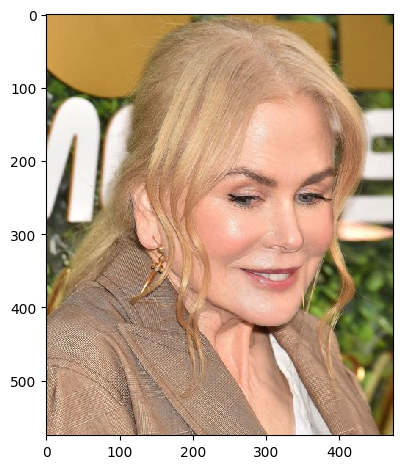

In [119]:
imshow(image_set[random.choice(personalities)][8])

changing the images to gray scale

In [120]:
image_set_gray = {}
limit = 100
for i in personalities:
    j=0
    image_set_gray[i] = [None]*limit
    for k in os.listdir('images/{}'.format(i)):
        if j<limit:
            try:
                image_set_gray[i][j] = rgb2gray(image_set[i][j][:,:,0:3])#all the images saved as array will be converted to gray scale
            except:
                pass
            j+=1
        else:
            break
    print(i,":",len(image_set_gray[i]))

Angelina Jolie : 100
Nicole Kidman : 100
Tom Hanks : 100


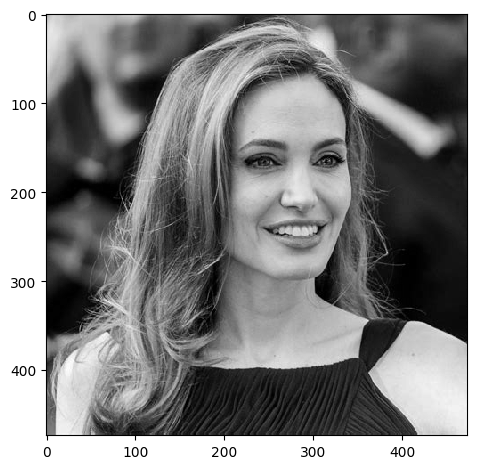

In [121]:
imshow(image_set_gray[random.choice(personalities)][0])

Image must be resized to maintain normality<br>
Its an very important step as various images are of various dimensions

In [122]:
for i in personalities:
    for j in range(100):
            image_set_gray[i][j] = resize(image_set_gray[i][j], (350,350))

In [123]:
len_of_images = {}
for i in personalities:
    len_of_images[i] = len(image_set_gray[i])
len_of_images

{'Angelina Jolie': 100, 'Nicole Kidman': 100, 'Tom Hanks': 100}

In [124]:
image_size = {}
for i in personalities:
    image_size[i] = image_set_gray[i][0].shape
image_size

{'Angelina Jolie': (350, 350),
 'Nicole Kidman': (350, 350),
 'Tom Hanks': (350, 350)}

In [125]:
flat = image_size[random.choice(personalities)][0]*image_size[random.choice(personalities)][1]

In [126]:
flat

122500

Flatten,Dstack and resize the 2D array of images into 1D array to be used by the ML model to train

In [127]:
for i in personalities:
    for j in range(len_of_images[i]):
        image_set_gray[i][j] = np.ndarray.flatten(image_set_gray[i][j]).reshape(flat,1)

In [128]:
for i in personalities:
    image_set_gray[i] = np.dstack(image_set_gray[i])

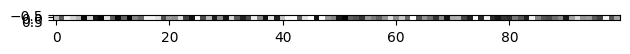

In [129]:
imshow(image_set_gray[random.choice(personalities)][1])

In [130]:
for i in personalities:
    image_set_gray[i] = np.rollaxis(image_set_gray[i],axis=2,start=0)

In [131]:
image_set_gray[random.choice(personalities)].shape

(100, 122500, 1)

In [132]:
for i in personalities:
    image_set_gray[i] = image_set_gray[i].reshape(len_of_images[i],flat)

Convert various images into dataframes to be used by the model

In [133]:
dataframeset = {}
for i in personalities:
    dataframeset[i] = pd.DataFrame(image_set_gray[i])

In [134]:
for i in personalities:
    dataframeset[i]['label'] = i

Concat all the dataframe 

In [135]:
actor_final = pd.DataFrame()
for i in personalities:
    actor_final = pd.concat([actor_final,dataframeset[i]])

In [136]:
actor_final

,0,1,2,3,4,5,6,7,8,9,...,122491,122492,122493,122494,122495,122496,122497,122498,122499,label
0,0.743948,0.746401,0.772445,0.797286,0.816032,0.841324,0.860115,0.851542,0.840810,0.832699,...,0.894994,0.904892,0.910245,0.912327,0.920911,0.925568,0.930996,0.953190,0.947463,Angelina Jolie
1,0.352312,0.345218,0.338334,0.334072,0.337389,0.341338,0.350522,0.349050,0.348304,0.350254,...,0.758180,0.716460,0.713781,0.773315,0.758435,0.696835,0.714056,0.741489,0.834915,Angelina Jolie
2,0.958619,0.939415,0.922827,0.921943,0.926488,0.926838,0.932058,0.930958,0.930403,0.932088,...,0.524098,0.272626,0.162409,0.207480,0.270544,0.255423,0.148605,0.170267,0.251342,Angelina Jolie
3,0.837898,0.824412,0.816680,0.821093,0.822481,0.820211,0.819987,0.819987,0.819987,0.819987,...,0.104730,0.126252,0.119983,0.117894,0.122017,0.127328,0.124989,0.123402,0.225415,Angelina Jolie
4,0.737596,0.716554,0.698458,0.688521,0.678978,0.670507,0.655583,0.639701,0.621602,0.609811,...,0.329474,0.350666,0.329655,0.368093,0.384448,0.355872,0.356205,0.336033,0.396300,Angelina Jolie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.689665,0.689329,0.691122,0.693218,0.696396,0.699587,0.703172,0.706758,0.710343,0.713929,...,0.364777,0.362157,0.360771,0.359385,0.357614,0.355831,0.354676,0.353698,0.353881,Tom Hanks
96,0.256940,0.239062,0.185965,0.186962,0.173658,0.172243,0.182097,0.176014,0.183196,0.198748,...,0.065506,0.051772,0.043040,0.037997,0.042407,0.050049,0.046328,0.039096,0.194595,Tom Hanks
97,0.453434,0.477102,0.478411,0.452926,0.444670,0.456282,0.428970,0.428097,0.446484,0.432308,...,0.237301,0.280851,0.154995,0.185806,0.240884,0.117983,0.102824,0.119555,0.203877,Tom Hanks
98,0.814815,0.814815,0.814815,0.814815,0.814965,0.815954,0.810979,0.808111,0.807278,0.807278,...,0.186393,0.186859,0.193321,0.204092,0.223109,0.212030,0.195174,0.188801,0.186082,Tom Hanks


<h2>Tranining<h2>

Train test split

In [137]:
x = actor_final.values[:,:-1]
y = actor_final.values[:,-1]

In [138]:
y

array(['Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie',

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

SVM algorithm 

In [141]:
from sklearn import svm

In [142]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [143]:
ypred = clf.predict(x_test)

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [145]:
accuracy_score(y_test,ypred)

0.7166666666666667

In [146]:
confusion_matrix(y_test, ypred)

array([[15,  3,  2],
       [ 3, 13,  4],
       [ 1,  4, 15]])

RandomForest Algorithm

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
model=RandomForestClassifier()

In [149]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [150]:
y_pred=model.predict(x_test)

In [151]:
accuracy_score(y_test,y_pred)

0.6833333333333333